# Experiment Three
This is the third experiment using three convolutional layers + dropout and no augmentation.

In [5]:
# model training using tensorflow
import numpy as np
import os
import cv2
from matplotlib import pyplot

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
'''
Configuration Code
'''
def get_n_cores():
    """The NSLOTS variable, If NSLOTS is not defined throw an exception."""
    nslots = os.getenv("NSLOTS")
    if nslots is not None:
        return int(nslots)
    raise ValueError("Environment variable NSLOTS is not defined.")


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

NUM_GPUS = len(tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", NUM_GPUS)
if NUM_GPUS > 0:
    print(os.getenv("CUDA_VISIBLE_DEVICES"))

tf.config.set_soft_device_placement(True)
tf.keras.backend.set_floatx("float32")
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(get_n_cores())

Num GPUs Available:  1
1


In [7]:
batch_size = 32

DATA_DIRECTORY = os.path.join(os.getcwd(), 'data', 'formatted_data')

size = (224,224) # height, width

'''
Load the training data
'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [8]:
'''
Load the validation data
'''
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [10]:
# there are two classes
num_classes = 2

# normalize the input images
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3))

model = Sequential([
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

In [13]:
epochs=100

# stop when the validation loss does not improve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[callback]
)

Epoch 1/100
75/75 [==============================] - 5s 68ms/step - loss: 0.5819 - accuracy: 0.7083 - val_loss: 0.3881 - val_accuracy: 0.8433
Epoch 2/100
75/75 [==============================] - 4s 56ms/step - loss: 0.3315 - accuracy: 0.8621 - val_loss: 0.3000 - val_accuracy: 0.8767
Epoch 3/100
75/75 [==============================] - 4s 53ms/step - loss: 0.2077 - accuracy: 0.9192 - val_loss: 0.2366 - val_accuracy: 0.9100
Epoch 4/100
75/75 [==============================] - 4s 52ms/step - loss: 0.1184 - accuracy: 0.9600 - val_loss: 0.2166 - val_accuracy: 0.9183
Epoch 5/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.1806 - val_accuracy: 0.9450
Epoch 6/100
75/75 [==============================] - 4s 58ms/step - loss: 0.0695 - accuracy: 0.9750 - val_loss: 0.1903 - val_accuracy: 0.9383
Epoch 7/100
75/75 [==============================] - 4s 59ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.1949 - val_accuracy: 0.9467
Epoch 

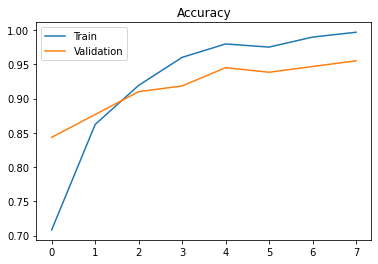

In [14]:
'''
Plot the accuracy
'''
pyplot.title("Accuracy")
pyplot.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label = "Train")
pyplot.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label = "Validation")
pyplot.legend()
pyplot.show()

In [15]:
model.save('models/experiment_003')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/experiment_003/assets
